In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

In [2]:
# Configuración general de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Análisis del modelo de clasificación

In [3]:
df_classification=pd.read_csv('resultados/df_visualization_global_CLASSIFICATION.csv')

In [4]:
final_results = df_classification.groupby('Window').apply(
    lambda x: x.loc[x['Epoch'].idxmax()]
).reset_index(drop=True)

print(f"Estadísticas generales del modelo de clasificación:")
print(f"Accuracy promedio: {final_results['Accuracy'].mean():.4f}")
print(f"AUC promedio: {final_results['AUC'].mean():.4f}")
print(f"F1 promedio: {final_results['F1'].mean():.4f}")
print(f"Precision promedio: {final_results['Precision'].mean():.4f}")
print(f"Recall promedio: {final_results['Recall'].mean():.4f}")

Estadísticas generales del modelo de clasificación:
Accuracy promedio: 0.5914
AUC promedio: 0.6322
F1 promedio: 0.5797
Precision promedio: 0.5835
Recall promedio: 0.5885


C:\Users\diego\AppData\Local\Temp\ipykernel_19988\3675085831.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_results = df_classification.groupby('Window').apply(


### Figura 1: Evolución de métricas principales por ventana temporal

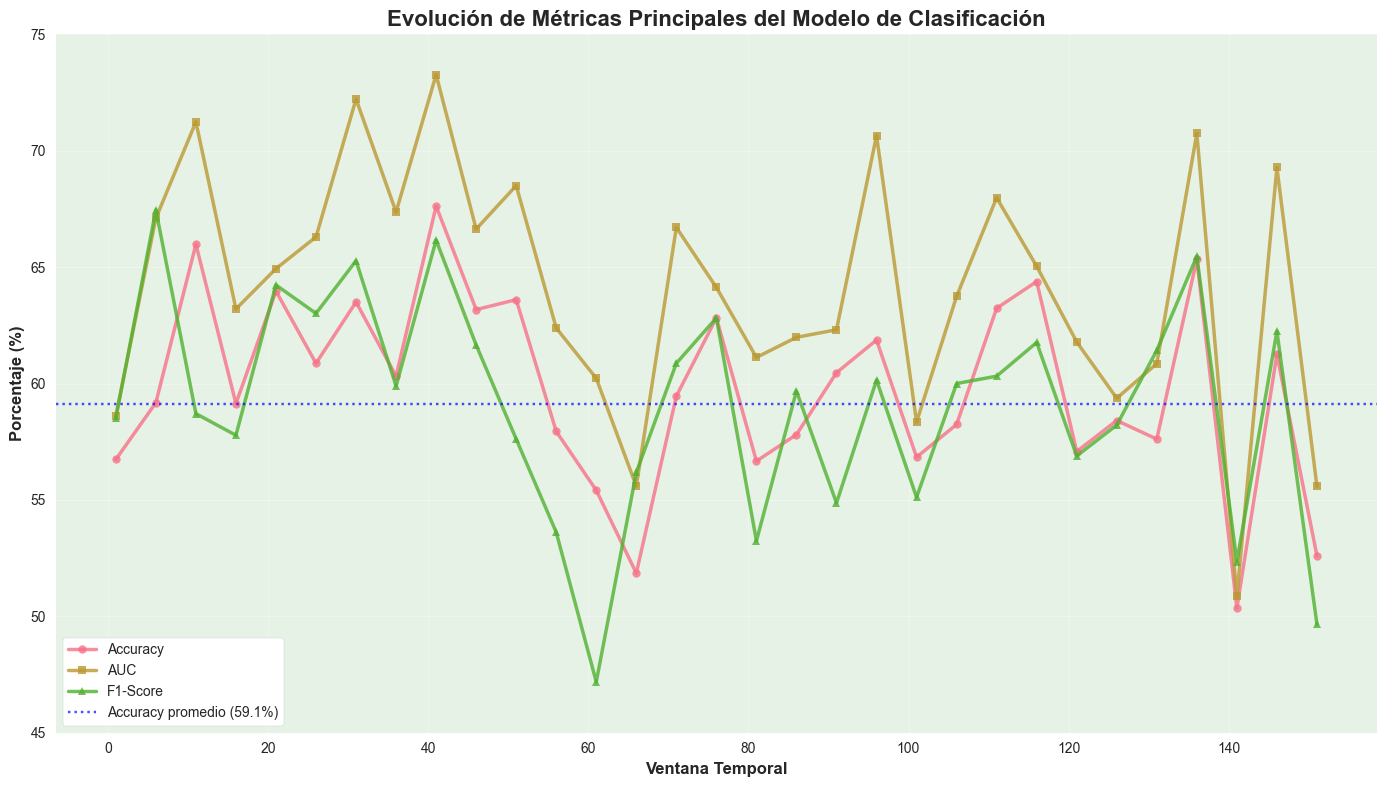

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

# Crear submuestreo para mejor visualización (cada 5 ventanas)
sample_final = final_results[::5].copy()

ax.plot(sample_final['Window'], sample_final['Accuracy'] * 100, 
        'o-', label='Accuracy', linewidth=2.5, markersize=6, alpha=0.8)
ax.plot(sample_final['Window'], sample_final['AUC'] * 100, 
        's-', label='AUC', linewidth=2.5, markersize=6, alpha=0.8)
ax.plot(sample_final['Window'], sample_final['F1'] * 100, 
        '^-', label='F1-Score', linewidth=2.5, markersize=6, alpha=0.8)

# Líneas de referencia
ax.axhline(y=final_results['Accuracy'].mean() * 100, color='blue', 
           linestyle=':', alpha=0.7, label=f'Accuracy promedio ({final_results["Accuracy"].mean()*100:.1f}%)')

ax.set_xlabel('Ventana Temporal', fontweight='bold')
ax.set_ylabel('Porcentaje (%)', fontweight='bold')
ax.set_title('Evolución de Métricas Principales del Modelo de Clasificación', 
             fontweight='bold', fontsize=16)
leg = ax.legend(loc='lower left', frameon=True)
leg.get_frame().set_facecolor('white')
leg.get_frame().set_alpha(1)

ax.grid(True, alpha=0.3)
ax.set_ylim(45, 75)
ax.set_facecolor('#e6f2e6')      
plt.tight_layout()
plt.show()



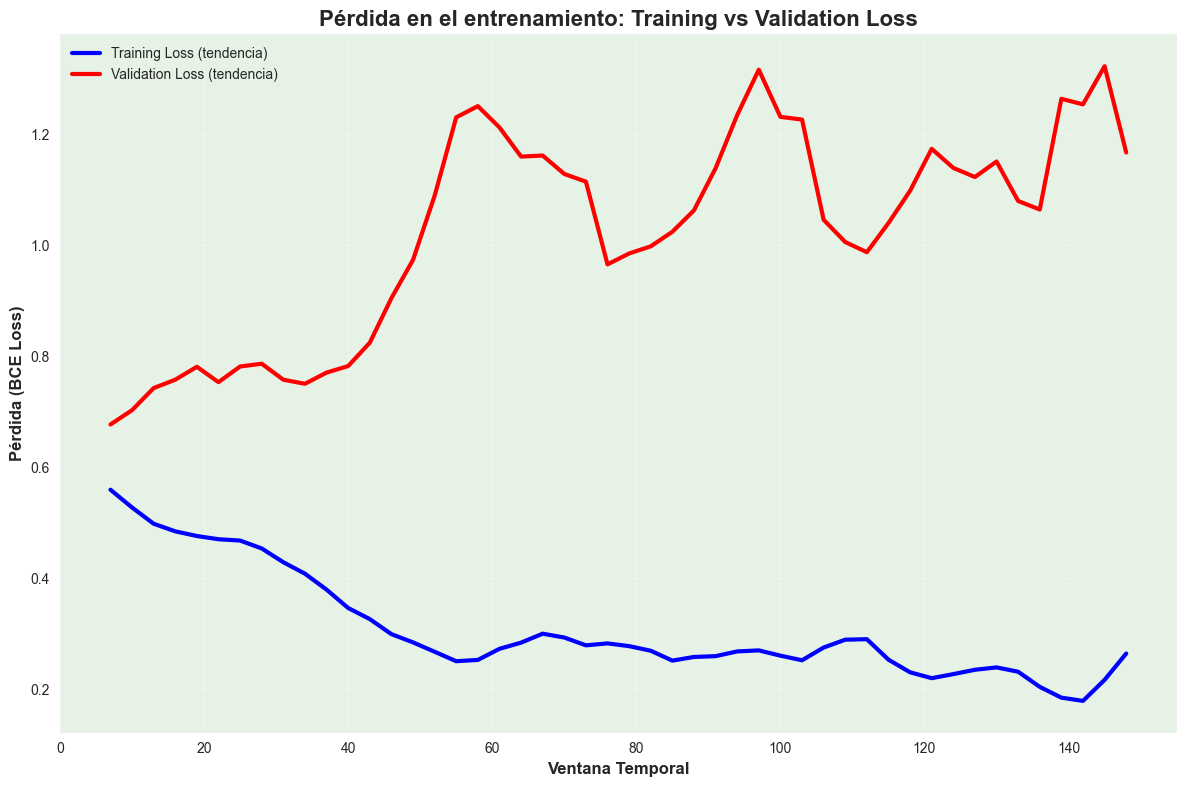

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

# Calcular medias móviles para suavizar las curvas
window_size = 10
final_results['TrainingLoss_MA'] = final_results['TrainingLoss'].rolling(window=window_size, center=True).mean()
final_results['ValidationLoss_MA'] = final_results['ValidationLoss'].rolling(window=window_size, center=True).mean()

# Submuestreo para mejor visualización
sample_final = final_results[::3].copy()

ax.plot(sample_final['Window'], sample_final['TrainingLoss_MA'], 
        '-', color='blue', linewidth=3, label='Training Loss (tendencia)')

ax.plot(sample_final['Window'], sample_final['ValidationLoss_MA'], 
        '-', color='red', linewidth=3, label='Validation Loss (tendencia)')

ax.set_xlabel('Ventana Temporal', fontweight='bold')
ax.set_ylabel('Pérdida (BCE Loss)', fontweight='bold')
ax.set_title('Pérdida en el entrenamiento: Training vs Validation Loss', 
             fontweight='bold', fontsize=16)
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_facecolor('#e6f2e6')  
plt.tight_layout()
plt.show()

# Análisis del modelo de regresión

In [3]:
df_regression=pd.read_csv('resultados/df_visualization_global_REGRESSION.csv')

In [4]:
# Obtener resultados finales por ventana (última época de cada ventana)
final_results = df_regression.groupby('Window').apply(
    lambda x: x.loc[x['Epoch'].idxmax()]
).reset_index(drop=True)

print(f"Estadísticas generales del modelo de regresión:")
print(f"R² promedio: {final_results['R2'].mean():.4f}")
print(f"MAE promedio: {final_results['MAE'].mean():.4f}")
print(f"RMSE promedio: {final_results['RMSE'].mean():.4f}")
print(f"MAPE promedio: {final_results['MAPE'].mean():.4f}")
print(f"MSE promedio: {final_results['MSE'].mean():.4f}")



Estadísticas generales del modelo de regresión:
R² promedio: 0.7388
MAE promedio: 0.0776
RMSE promedio: 0.0990
MAPE promedio: 20.8076
MSE promedio: 0.0105


C:\Users\diego\AppData\Local\Temp\ipykernel_9740\3018346057.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_results = df_regression.groupby('Window').apply(


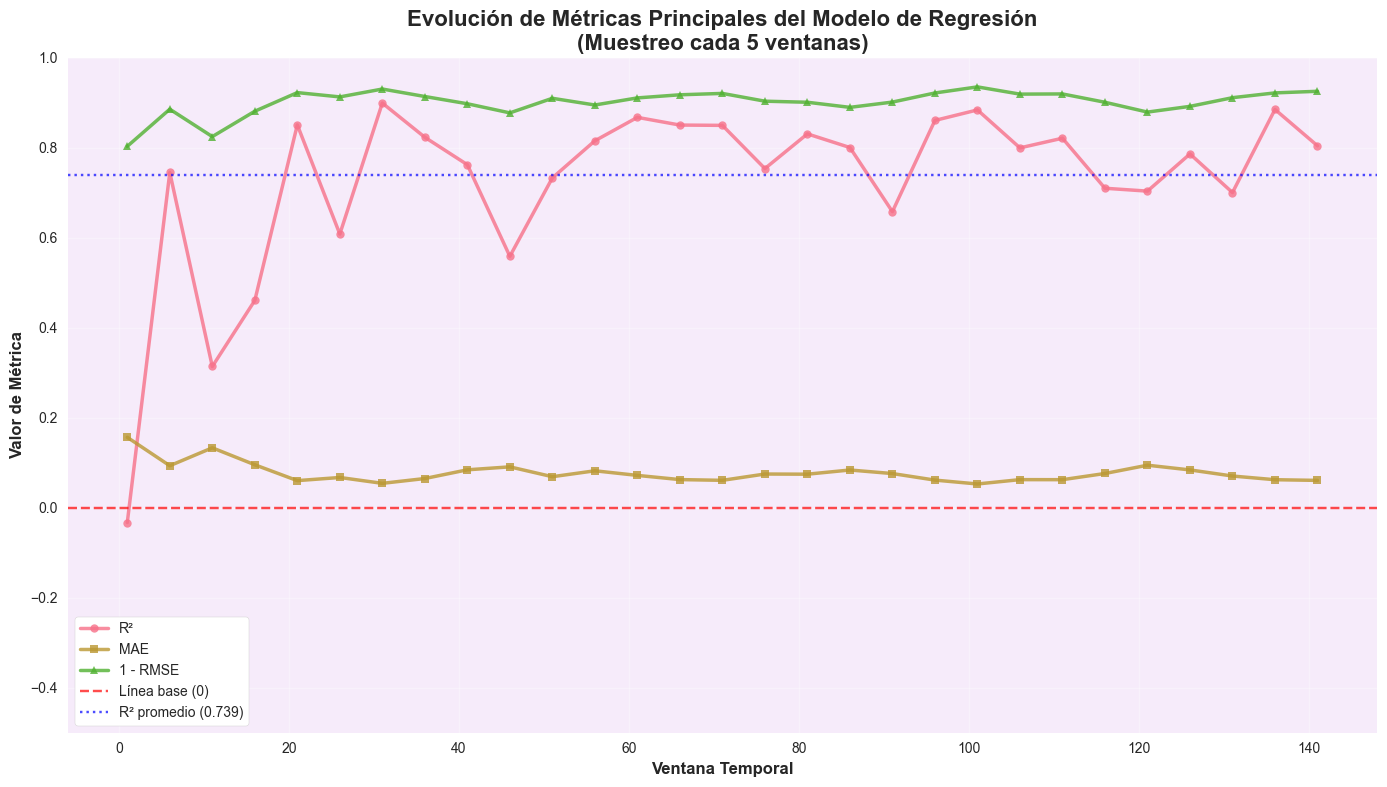

In [18]:
# =============================================================================
# FIGURA 1: Evolución de métricas principales por ventana temporal
# =============================================================================
fig, ax = plt.subplots(figsize=(14, 8))

# Crear submuestreo para mejor visualización (cada 5 ventanas)
sample_final = final_results[::5].copy()

ax.plot(sample_final['Window'], sample_final['R2'], 
        'o-', label='R²', linewidth=2.5, markersize=6, alpha=0.8)
ax.plot(sample_final['Window'], sample_final['MAE'], 
        's-', label='MAE', linewidth=2.5, markersize=6, alpha=0.8)
ax.plot(sample_final['Window'], 1 - sample_final['RMSE'], 
        '^-', label='1 - RMSE', linewidth=2.5, markersize=6, alpha=0.8)

# Líneas de referencia
ax.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Línea base (0)')
ax.axhline(y=final_results['R2'].mean(), color='blue', 
           linestyle=':', alpha=0.7, label=f'R² promedio ({final_results["R2"].mean():.3f})')

ax.set_xlabel('Ventana Temporal', fontweight='bold')
ax.set_ylabel('Valor de Métrica', fontweight='bold')
ax.set_title('Evolución de Métricas Principales del Modelo de Regresión\n(Muestreo cada 5 ventanas)', 
             fontweight='bold', fontsize=16)
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
ax.set_ylim(-0.5, 1.0)
ax.set_facecolor('#F6EBFA')    
leg = ax.legend(loc='lower left', frameon=True)
leg.get_frame().set_facecolor('white')
leg.get_frame().set_alpha(1)

plt.tight_layout()
plt.savefig('fig_5_6_evolucion_metricas_regresion.png', dpi=300, bbox_inches='tight')
plt.show()


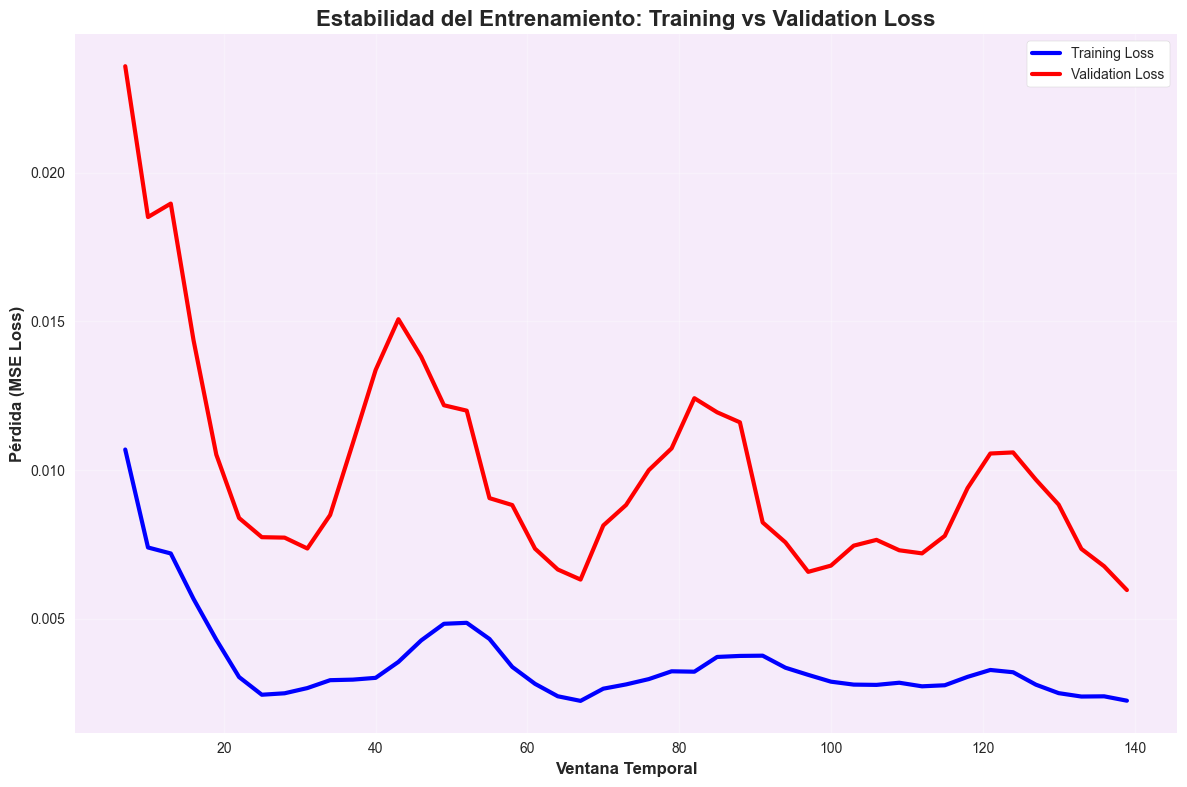

In [22]:

# =============================================================================
# FIGURA 2: Estabilidad del entrenamiento - Training vs Validation Loss
# =============================================================================
fig, ax = plt.subplots(figsize=(12, 8))

# Calcular medias móviles para suavizar las curvas
window_size = 10
final_results['TrainingLoss_MA'] = final_results['TrainingLoss'].rolling(window=window_size, center=True).mean()
final_results['ValidationLoss_MA'] = final_results['ValidationLoss'].rolling(window=window_size, center=True).mean()

# Submuestreo para mejor visualización
sample_final = final_results[::3].copy()

ax.plot(sample_final['Window'], sample_final['TrainingLoss_MA'], 
        '-', color='blue', linewidth=3, label='Training Loss')

ax.plot(sample_final['Window'], sample_final['ValidationLoss_MA'], 
        '-', color='red', linewidth=3, label='Validation Loss')

ax.set_xlabel('Ventana Temporal', fontweight='bold')
ax.set_ylabel('Pérdida (MSE Loss)', fontweight='bold')
ax.set_title('Estabilidad del Entrenamiento: Training vs Validation Loss', 
             fontweight='bold', fontsize=16)
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_facecolor('#F6EBFA')  
leg = ax.legend(loc='upper right', frameon=True)
leg.get_frame().set_facecolor('white')
leg.get_frame().set_alpha(1)

plt.tight_layout()
plt.savefig('fig_5_10_estabilidad_entrenamiento_regresion.png', dpi=300, bbox_inches='tight')
plt.show()


In [15]:

# Estadísticas de resumen
print("\n" + "="*60)
print("RESUMEN ESTADÍSTICO DEL MODELO DE REGRESIÓN")
print("="*60)
print(f"Total de ventanas analizadas: {len(final_results)}")
print(f"Época promedio de convergencia: {final_results['Epoch'].mean():.1f} ± {final_results['Epoch'].std():.1f}")
print(f"Rango de R²: {final_results['R2'].min():.3f} - {final_results['R2'].max():.3f}")
print(f"Rango de MAE: {final_results['MAE'].min():.4f} - {final_results['MAE'].max():.4f}")
print(f"Rango de RMSE: {final_results['RMSE'].min():.4f} - {final_results['RMSE'].max():.4f}")
print(f"Ventanas con R² > 0: {sum(final_results['R2'] > 0)} ({sum(final_results['R2'] > 0)/len(final_results)*100:.1f}%)")
print(f"Ventanas con R² > 0.1: {sum(final_results['R2'] > 0.1)} ({sum(final_results['R2'] > 0.1)/len(final_results)*100:.1f}%)")
print(f"Ventanas con R² negativo: {sum(final_results['R2'] < 0)} ({sum(final_results['R2'] < 0)/len(final_results)*100:.1f}%)")
print(f"MAPE promedio: {final_results['MAPE'].mean():.2f}%")


RESUMEN ESTADÍSTICO DEL MODELO DE REGRESIÓN
Total de ventanas analizadas: 143
Época promedio de convergencia: 11.8 ± 6.9
Rango de R²: -0.033 - 0.902
Rango de MAE: 0.0516 - 0.1713
Rango de RMSE: 0.0646 - 0.2111
Ventanas con R² > 0: 141 (98.6%)
Ventanas con R² > 0.1: 140 (97.9%)
Ventanas con R² negativo: 2 (1.4%)
MAPE promedio: 20.81%
